# Nombre de structures par département et par habitant

In [34]:
import pandas as pd
import geopandas as gpd
from dgfip.read import get_structures, get_pop_dep, get_dep

In [35]:
structures = get_structures()

In [36]:
# Total par service + rajout catégorie non buraliste
count = structures.groupby(['DEPARTEMENT','TYPE DE SERVICE'], as_index=False).size()
tot = count[count['TYPE DE SERVICE'] != 'Buralistes'].groupby('DEPARTEMENT').sum().reset_index()
tot['TYPE DE SERVICE'] = 'Non Buralistes'
base = pd.concat((count, tot[['DEPARTEMENT', 'TYPE DE SERVICE', 'size']]))

In [37]:
# import de la population française
population = get_pop_dep()

In [38]:
# ~ normalisation
count_norm = base.merge(population, left_on='DEPARTEMENT', right_on="CODDEP")
count_norm['par_hab'] = count_norm['size']/count_norm['PTOT']*10000
base = count_norm[['DEPARTEMENT','TYPE DE SERVICE', 'par_hab','size']]

Text(0.5, 1.0, 'Nombre de structures DGFiP (hors Buralistes)')

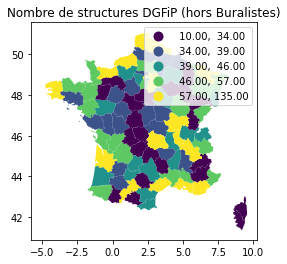

In [39]:
dep = get_dep()
geobase = dep.merge(base, left_on="code", right_on = 'DEPARTEMENT')
ax = geobase[geobase['TYPE DE SERVICE'] == 'Non Buralistes'].plot('size', scheme="Quantiles", legend=True)
ax.set_title('Nombre de structures DGFiP (hors Buralistes)')

Text(0.5, 1.0, 'Nombre de structures DGFiP pour 10 000 habitants (hors Buralistes)')

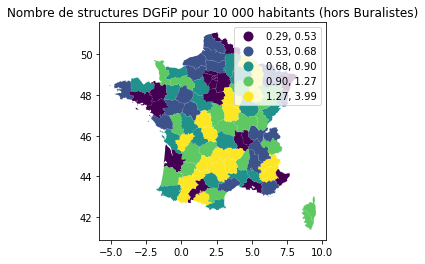

In [40]:
ax = geobase[geobase['TYPE DE SERVICE'] == 'Non Buralistes'].plot('par_hab', scheme="Quantiles", legend=True)
ax.set_title('Nombre de structures DGFiP pour 10 000 habitants (hors Buralistes)')